In [4]:
import pandas as pd
import numpy as np

In [5]:
taxiData=pd.read_csv("TaxiFare.csv")
taxiData.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# Dropping Unnecessary columns

In [6]:
taxiData.drop("unique_id",axis=1,inplace=True)

In [7]:
taxiData.shape

(50000, 7)

In [8]:
taxiData.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [10]:
taxiData['distance']=None

In [11]:
for i in range(len(taxiData)):
    taxiData.iloc[i,7]=haversine(taxiData.iloc[i,2],taxiData.iloc[i,3],taxiData.iloc[i,4],taxiData.iloc[i,5])

In [12]:
taxiData.drop(["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1,inplace=True)

# Extracting year-month-hour

In [13]:
taxiData['year']=pd.DatetimeIndex(taxiData['date_time_of_pickup']).year
taxiData['month']=pd.DatetimeIndex(taxiData['date_time_of_pickup']).month
taxiData['hours']=pd.DatetimeIndex(taxiData['date_time_of_pickup']).hour

In [14]:
taxiData.drop('date_time_of_pickup',axis=1,inplace=True)

In [15]:
taxiData.dtypes

amount             float64
no_of_passenger      int64
distance            object
year                 int64
month                int64
hours                int64
dtype: object

In [17]:
x=taxiData.drop("amount",axis=1)
y=taxiData['amount']

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=333)

# Train Set Processing

In [19]:
x_train.dtypes

no_of_passenger     int64
distance           object
year                int64
month               int64
hours               int64
dtype: object

In [20]:
x_train['distance']=x_train['distance'].astype('int64')

<ipython-input-20-db018b356893>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['distance']=x_train['distance'].astype('int64')


In [21]:
x_train['year']=x_train['year'].astype(object)

<ipython-input-21-e3717a630eee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['year']=x_train['year'].astype(object)


In [22]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
le.fit(x_train['year'])

LabelEncoder()

In [24]:
x_train['year']=le.transform(x_train['year'])

<ipython-input-24-dfa064385251>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['year']=le.transform(x_train['year'])


In [25]:
# Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [26]:
ss.fit(x_train)

StandardScaler()

In [27]:
x_trainscaled=ss.transform(x_train)

In [28]:
x_trainscaled

array([[-0.51821187, -0.05156053, -1.47138162, -1.23429846, -0.69515058],
       [-0.51821187,  0.00618365, -0.93359594,  0.50065776,  0.22908279],
       [-0.51821187, -0.03781192,  0.6797611 , -0.94513909,  0.84523837],
       ...,
       [-0.51821187, -0.04881081,  1.75533246, -1.52345783,  0.99927727],
       [ 1.03308845, -0.04606109,  0.14197542, -1.52345783, -2.08150063],
       [-0.51821187, -0.04056164,  0.14197542,  1.36813587,  0.53716058]])

# Initializing models

In [29]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor(n_estimators=100,criterion='mse', max_depth=None, min_samples_split=2, 
                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, 
                         random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [30]:
rr.fit(x_trainscaled,y_train)

RandomForestRegressor()

# Test Set Processing

In [31]:
x_test.dtypes

no_of_passenger     int64
distance           object
year                int64
month               int64
hours               int64
dtype: object

In [32]:
x_test['distance'] = x_test["distance"].astype("int64")

<ipython-input-32-7e11db992968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['distance'] = x_test["distance"].astype("int64")


In [33]:
x_test['year'] = x_test["year"].astype("category")

<ipython-input-33-bac556dc5562>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['year'] = x_test["year"].astype("category")


In [34]:
x_test['year'] = le.fit_transform(x_test['year'])

<ipython-input-34-e76998e04f89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['year'] = le.fit_transform(x_test['year'])


In [35]:
x_testscaled=ss.transform(x_test)

In [36]:
x_testscaled

array([[ 0.25743829, -0.05156053, -1.47138162,  1.65729524,  0.84523837],
       [-0.51821187, -0.04331137, -0.93359594,  1.36813587,  0.38312169],
       [-0.51821187, -0.04881081,  1.21754678,  0.21149839,  0.69119948],
       ...,
       [-0.51821187, -0.05156053, -0.39581026,  0.50065776,  0.99927727],
       [-0.51821187, -0.04056164,  1.21754678, -1.23429846,  0.22908279],
       [-0.51821187, -0.04331137,  0.6797611 , -0.94513909, -1.00322837]])

# Predictions

In [37]:
predictions=rr.predict(x_testscaled)

In [38]:
import seaborn as sns

C:\Users\balag\anaconda\envs\Test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

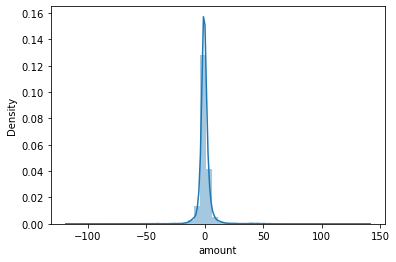

In [39]:
# distplot
sns.distplot(y_test-predictions)

In [41]:
import matplotlib.pyplot as plt

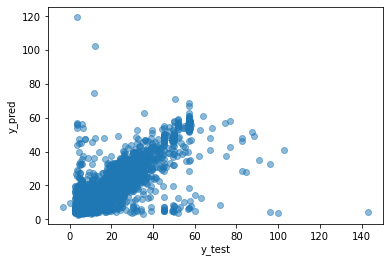

In [42]:
# scatter plot for y_test and y_pred (linear regression)
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Metrics

In [43]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [45]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

MAE: 2.805801852750237
MSE: 33.931699499642015


In [46]:
print("RMSES:",np.sqrt(mean_squared_error(predictions,y_test)))

RMSES: 5.825092230998751


In [51]:
print("r2 score:",r2_score(predictions,y_test))

r2 score: 0.5477234521042343


In [52]:
# adjusted r2 score
r2 = r2_score(y_test,predictions)
n = len(x_test)
k = x_test.shape[1]
adj_r2_score = 1 - (((1- r2)*(n-1)) / (n - k - 1))
print("adj_r2_score  value is : ",adj_r2_score)

adj_r2_score  value is :  0.6265792204002831
